# Neural Network

In [ ]:
# [1]

# Importing required libraries and packages 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

%matplotlib inline

## Get IMdb data

In [ ]:
# [2]

# Reading data from CSV and converting it to as Dataframe using Pandas

# imdb_data = pd.read_csv("./data/IMDB Dataset.csv")

# Temporarily reading the raw data from github for convineince
imdb_data = pd.read_csv("https://raw.githubusercontent.com/vidheeshnacode/CIS668/main/data/IMDB%20Dataset.csv")


# Processing the target variable

# Mapping sentiment column values 'positive' to 1 and 'negative' to 0
imdb_data["sentiment"] = imdb_data["sentiment"].map({"positive": 1, "negative":0})

In [ ]:
# [3]

# Dataset contains 2 column and 50000 rows.
# Columns: review, sentiment of string and int64 datatype respectively
imdb_data.shape

(50000, 2)

In [ ]:
# [4]

# Splitting the dataset for training and testing

# Assigning 50% of the data for training and 50% data for testing
imdb_train = imdb_data["review"].values[:25000]
imdb_test = imdb_data["review"].values[25000:]

# Seperating sentiment labels for training and testing
imdb_train_labels = imdb_data["sentiment"].values[:25000]
imdb_test_labels = imdb_data["sentiment"].values[25000:]

### Hyperparameters

In [ ]:
# [5]

# Hyperparameters list makes it easier to quickly test different combinations
# sentence shorter than max_length it will be padded, longer sentences will be truncated

# Below values are to be used by Neural Network Models in the modeling section of the notebook.
vocab_size = 10000 # Set voicabulary size that is to be referred by the model
embedding_dim = 64 # Dimensionality of the pretrained word vectors
max_length = 120 # Set max length of vectors

## Tokenize

In [ ]:
# [6]

# Defining tokenizer to tokenize training data
tokenizer = Tokenizer(num_words=10000, oov_token = "<oov>")
tokenizer.fit_on_texts(imdb_train)
word_index = tokenizer.word_index

# Converting words to numbers and pad for the neural network to use it as input
train_sequences = tokenizer.texts_to_sequences(imdb_train)
train_padded = pad_sequences(train_sequences, maxlen=120, truncating="post")

# Tokenized using the word_index learned from the training data
testing_sequences = tokenizer.texts_to_sequences(imdb_test)
test_padded = pad_sequences(testing_sequences, maxlen=120, truncating="post")

## Neural Network

In [ ]:
# [7]

# Creating Model

# Create Sequential Model with 4 Layers.

model = tf.keras.Sequential([
    
    # Embedding Layer: This layer converts vocab sized input dimension to dense vectors of size embedding dimensions
    tf.keras.layers.Embedding(vocab_size, embedding_dim),

    #  GlobalAveragePooling1D: This layer applying global average pooling operation for temporal data.
    tf.keras.layers.GlobalAveragePooling1D(),

    # Dense Layer: This layer computes the weighted averages from output of previous layers with RELU activation functions
    tf.keras.layers.Dense(6, activation = 'relu'),

    # Dense Layer: This layer computes the weighted averages from output of previous layers with Sigmoid activation functions
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Print description of the Sequential Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 640,397
Trainable params: 640,397
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# [8]

# Compiling model with binary_crossentropy loss function and Adam optimizer with
# accuracy metric keeping track.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# [9]

# Training the Sequential Model
num_epochs = 5

# Fitting the model to the training dataset with 'imdb_train' and
# corresponding labels 'imdb_train_labels'.

# Setting Validatation Data to padding sequences created from train_padded

history = model.fit(train_padded, 
                    imdb_train_labels, 
                    epochs=num_epochs, 
                    validation_data=(test_padded, imdb_test_labels), 
                    validation_steps=30)

Epoch 1/5
782/782 [==============================] - 10s 11ms/step - loss: 0.5167 - accuracy: 0.7568 - val_loss: 0.3762 - val_accuracy: 0.8336
Epoch 2/5
782/782 [==============================] - 9s 11ms/step - loss: 0.3126 - accuracy: 0.8679 - val_loss: 0.3460 - val_accuracy: 0.8486
Epoch 3/5
782/782 [==============================] - 9s 11ms/step - loss: 0.2579 - accuracy: 0.8955 - val_loss: 0.3536 - val_accuracy: 0.8467
Epoch 4/5
782/782 [==============================] - 9s 11ms/step - loss: 0.2248 - accuracy: 0.9130 - val_loss: 0.3761 - val_accuracy: 0.8418
Epoch 5/5
782/782 [==============================] - 9s 11ms/step - loss: 0.1992 - accuracy: 0.9240 - val_loss: 0.4033 - val_accuracy: 0.8371


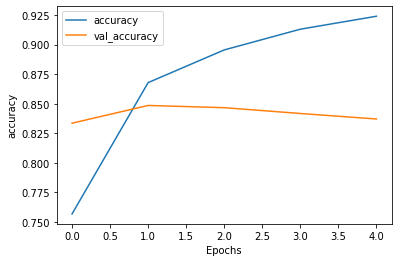

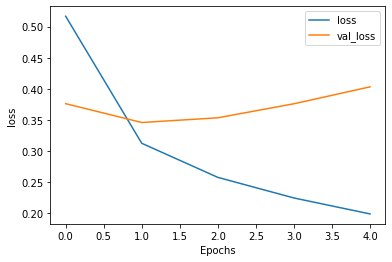

In [ ]:
# [10]

# Plotting graph based on Epochs

# Simple graph history of the model agains number of Epochs

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+ string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Plot Accuracy of the model corresponding against Number of Epochs
plot_graphs(history,'accuracy')

# Plot Loss of the model corrensponding against Number of Epochs
plot_graphs(history, 'loss')

## Convolutional Neural Network

In [ ]:
# [11]

# Creating a Model

# Create Sequential Convolutional Neural Network 5 Layers.

model = tf.keras.Sequential([
    
    # One Embedding with input dimensions as vocab_size and 64 as output dimensions.
    tf.keras.layers.Embedding(vocab_size, 64),

    # One Dimensional Convolution Layer with Filter of 128, Kernel size 3 and RELU Activation Function
    tf.keras.layers.Conv1D(128, 3, activation='relu'),

    # One Dimensional Global Average Pooling layer for temporal data.
    tf.keras.layers.GlobalMaxPooling1D(),

    # Dense Layer with 16 Units and RELU Activation Function
    tf.keras.layers.Dense(16, activation = 'relu'),

    # Dense Layer with 1 Unit and RELU Activation Function
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Print description of the Sequential CNN Model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          640000    
                                                                 
 conv1d (Conv1D)             (None, None, 128)         24704     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 666,785
Trainable params: 666,785
Non-trainable params: 0
________________________________________________

In [ ]:
# [12]

# Compiling model with binary_crossentropy loss function and Adam optimizer with
# learning rate 0.0001 and accuracy metric to keep track.
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

### Train the model

In [ ]:
# [13]

# Training new Sequential CNN Model

# Fitting the model to the training dataset with 'imdb_train' and
# corresponding labels 'imdb_train_labels'.

# Setting Validatation Data to padding sequences created from train_padded
epochs_num = 5
history = model.fit(train_padded, 
                    imdb_train_labels, 
                    epochs=epochs_num,
                    validation_data=(test_padded, imdb_test_labels), 
                    validation_steps=30)

Epoch 1/5
782/782 [==============================] - 27s 33ms/step - loss: 0.6749 - accuracy: 0.6467 - val_loss: 0.6237 - val_accuracy: 0.6932
Epoch 2/5
782/782 [==============================] - 25s 32ms/step - loss: 0.5328 - accuracy: 0.7520 - val_loss: 0.4801 - val_accuracy: 0.7712
Epoch 3/5
782/782 [==============================] - 25s 32ms/step - loss: 0.4273 - accuracy: 0.8069 - val_loss: 0.4257 - val_accuracy: 0.7997
Epoch 4/5
782/782 [==============================] - 25s 32ms/step - loss: 0.3633 - accuracy: 0.8445 - val_loss: 0.3930 - val_accuracy: 0.8196
Epoch 5/5
782/782 [==============================] - 25s 32ms/step - loss: 0.3114 - accuracy: 0.8716 - val_loss: 0.3741 - val_accuracy: 0.8288


### Make predictions on text samples

In [ ]:
# [14]

# Example predicting of a Positive sample

# Sample text
sample_text_to_predict = ["The movie was cool. The animation and the graphics were out of this world. I would recommend this movie."]

# Tokenize the sample
pos_sequence = tokenizer.texts_to_sequences(sample_text_to_predict)

# Padding all the sequences to the length of 20
pos_padded = pad_sequences(pos_sequence, maxlen=20, truncating="post")

# Making the prediction
prediction = model.predict(pos_padded)
print(prediction)

1/1 [==============================] - 0s 106ms/step
[[0.7841156]]


In [ ]:
# [15]

# Example predicting of a Negative sample

# Sample text
sample_text_to_predict = ["The movie was not good. The animation and the graphics were terrible. I would not recommend this movie."]

# Tokenize the sample
neg_sequence = tokenizer.texts_to_sequences(sample_text_to_predict)

# Padding all the sequences to the length of 20
neg_padded = pad_sequences(neg_sequence, maxlen=20, truncating="post")

# Making the prediction
prediction = model.predict(neg_padded)
print(prediction)

1/1 [==============================] - 0s 18ms/step
[[0.05059367]]


### Plot learning curves

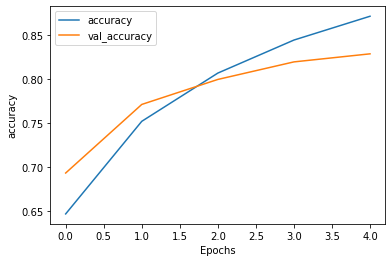

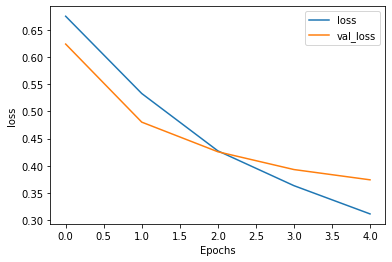

In [ ]:
# [16]

# Plotting loss and accuracy chart corrensponding to Epochs

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')